# Introduction

The MNIST (Modified National Institute of Standards and Technology database) database is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

The MNIST database contains 60,000 training images and 10,000 test images. Each image is a grayscale image of a handwritten digit, with a size of 28x28 pixels. The digits are labeled from 0 to 9, with each digit having an equal number of training and test images.

The MNIST database is a very popular dataset for machine learning because it is relatively small and easy to work with, but it is still challenging enough to produce good results. The MNIST dataset is also a good starting point for learning about image processing and machine learning.

Here is a more detailed description of the MNIST dataset:

Split: The MNIST dataset is split into two parts: a training set and a test set. The training set contains 60,000 images, and the test set contains 10,000 images.
Labels: Each image in the MNIST dataset is labeled with a digit from 0 to 9. The labels are evenly distributed between the training and test sets.
Format: The MNIST dataset is stored in a simple binary format. Each image is represented as a 28x28 array of pixels, with each pixel value ranging from 0 to 255. The labels are stored as a separate array, with each label represented as a single byte.
The MNIST dataset can be downloaded from a variety of sources, including the following:

The official MNIST website: http://yann.lecun.com/exdb/mnist/
Kaggle: https://www.kaggle.com/datasets/zalando-research/fashionmnist
TensorFlow Datasets: https://www.tensorflow.org/datasets/catalog/mnist
The MNIST dataset is a great resource for anyone who is interested in learning about image processing or machine learning. It is also a good dataset for testing new algorithms and techniques.

# Problem Statement

Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

Task3:- Compare between various models and find the classifier that works better.


In [2]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

# Data Analysis

## Image Visualization

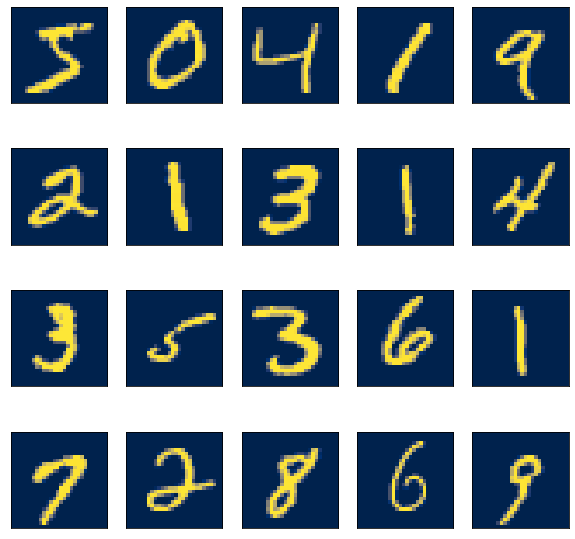

In [4]:
fig = plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(4,5, i+1, xticks=[], yticks=[])
    plt.imshow(xtrain[i], cmap='cividis')

In [5]:
ytrain[4]

9

In [6]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

In [7]:
type(ytrain), type(xtrain)

(numpy.ndarray, numpy.ndarray)

In [8]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [9]:
labels = np.unique(ytrain)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
# one hot encoding
num_classes = len(np.unique(ytrain))
y_train = keras.utils.to_categorical(ytrain, num_classes)
y_test = keras.utils.to_categorical(ytest, num_classes)

In [11]:
xtrain.shape, y_train.shape

((60000, 28, 28), (60000, 10))

# Model Creation

### Convolutional Neural network

In [12]:
# 5. Creating model architectire

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
# Model creation
cnn_model = Sequential()

# Layer creation
cnn_model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=2))

cnn_model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2))

cnn_model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(10, activation='softmax'))

In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [15]:
# Optimizer - weights & learning rate changes - to reduce loss
cnn_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
# Checkpoint creation

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'handwrittendigits_cnn_model.h5', verbose = 2, save_best_only=True)

In [17]:
# 8. Training

cnn_train = cnn_model.fit(xtrain, y_train, epochs=10,
                  validation_split=0.2,
                  batch_size=32,
                  callbacks=[checkpoint],
                  verbose = 2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.05790, saving model to handwrittendigits_cnn_model.h5
1500/1500 - 23s - loss: 0.1785 - accuracy: 0.9442 - val_loss: 0.0579 - val_accuracy: 0.9832 - 23s/epoch - 15ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.05790 to 0.04180, saving model to handwrittendigits_cnn_model.h5
1500/1500 - 22s - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0418 - val_accuracy: 0.9876 - 22s/epoch - 15ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.04180 to 0.03655, saving model to handwrittendigits_cnn_model.h5
1500/1500 - 22s - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.0366 - val_accuracy: 0.9893 - 22s/epoch - 15ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.03655 to 0.03620, saving model to handwrittendigits_cnn_model.h5
1500/1500 - 21s - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0362 - val_accuracy: 0.9891 - 21s/epoch - 14ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.03620
1500/1500 - 22s - loss: 0.0271 - accu

In [18]:
cnn_model.save('handwrittendigits_cnn_model.h5')

## Accuracy calculation

In [19]:
def acc_loss_calc(model, xtrain, xtest, y_train, y_test):
    tr_score = model.evaluate(xtrain, y_train, verbose=0)
    tt_score = model.evaluate(xtest, y_test, verbose=0)
    return ('Train score : ', tr_score, 'Test score : ', tt_score)

In [20]:
print(acc_loss_calc(cnn_model, xtrain, xtest, y_train, y_test))

('Train score : ', [0.022474749013781548, 0.9939666390419006], 'Test score : ', [0.05327095463871956, 0.9873999953269958])


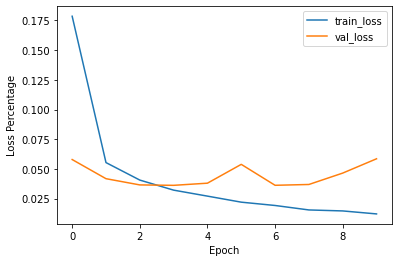

In [21]:
plt.plot(cnn_train.history['loss'], label='train_loss')
plt.plot(cnn_train.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Percentage')
plt.legend()
plt.show()

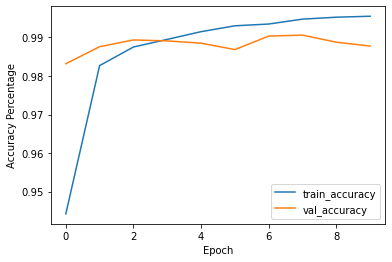

In [22]:
plt.plot(cnn_train.history['accuracy'], label='train_accuracy')
plt.plot(cnn_train.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Percentage')
plt.legend()
plt.show()

## Image visualization

In [23]:
def img_visual(model, xtest, y_test):
    ypred = model.predict(xtest)

    fig = plt.figure(figsize=(20,10))

    for i , idx in enumerate(np.random.choice(xtest.shape[0], size = 50, replace = True)):
        plt.subplot(5,10, i+1, xticks=[], yticks=[])
        plt.imshow(xtest[i], cmap='cividis')
        pred_idx = np.argmax(ypred[i])
        exp_idx = np.argmax(y_test[i])
        plt.title('{} ({})'.format(labels[pred_idx], labels[exp_idx]),
                     color=('blue' if pred_idx == exp_idx else 'red'))

313/313 [==============================] - 2s 5ms/step


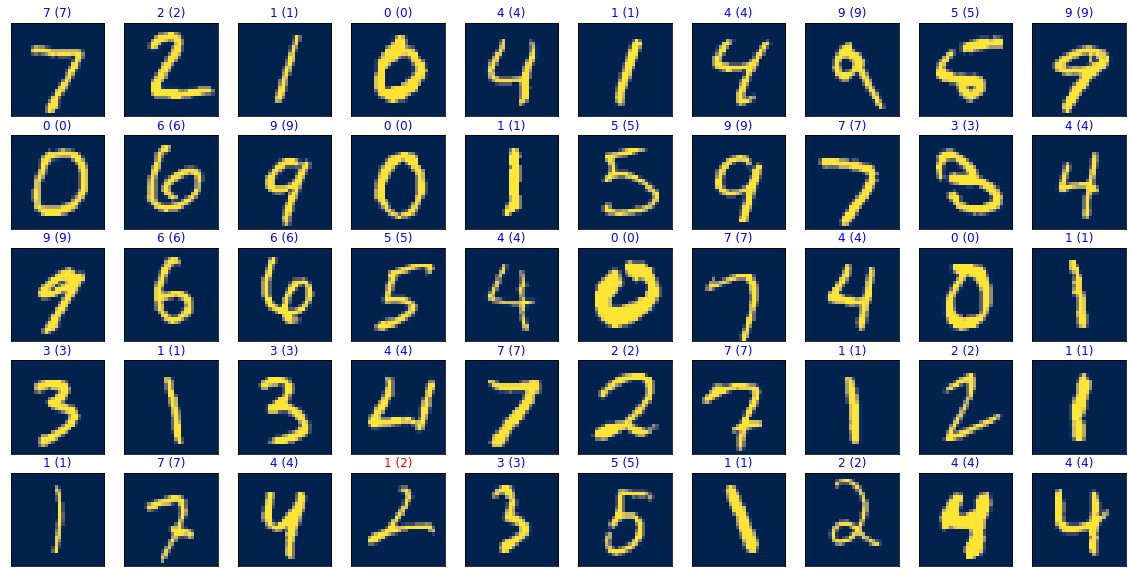

In [24]:
img_visual(cnn_model, xtest, y_test)

## Artificial Neural Network model

In [25]:
# Model creation
ann_model = Sequential()

# Layer creation
ann_model.add(Flatten(input_shape=(28,28,1)))

ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dense(100, activation='relu'))
ann_model.add(Dense(10, activation='softmax'))

In [26]:
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               392500    
                                                                 
 dense_3 (Dense)             (None, 100)               50100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Optimizer - weights & learning rate changes - to reduce loss
ann_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
# Checkpoint creation

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'handwrittendigits_ann_model.h5', verbose = 2, save_best_only=True)

In [29]:
# 8. Training

ann_train = ann_model.fit(xtrain, y_train, epochs=10,
                  validation_split=0.2,
                  batch_size=32,
                  callbacks=[checkpoint],
                  verbose = 2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.12020, saving model to handwrittendigits_ann_model.h5
1500/1500 - 10s - loss: 0.2138 - accuracy: 0.9346 - val_loss: 0.1202 - val_accuracy: 0.9615 - 10s/epoch - 6ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.12020 to 0.09161, saving model to handwrittendigits_ann_model.h5
1500/1500 - 9s - loss: 0.0871 - accuracy: 0.9728 - val_loss: 0.0916 - val_accuracy: 0.9728 - 9s/epoch - 6ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.09161 to 0.08435, saving model to handwrittendigits_ann_model.h5
1500/1500 - 9s - loss: 0.0568 - accuracy: 0.9816 - val_loss: 0.0843 - val_accuracy: 0.9766 - 9s/epoch - 6ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.08435
1500/1500 - 9s - loss: 0.0439 - accuracy: 0.9856 - val_loss: 0.0862 - val_accuracy: 0.9743 - 9s/epoch - 6ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.08435
1500/1500 - 9s - loss: 0.0326 - accuracy: 0.9893 - val_loss: 0.0904 - val_accuracy: 0.9756 - 9s/epo

In [30]:
ann_model.save('handwrittendigits_ann_model.h5')

In [31]:
print(acc_loss_calc(ann_model, xtrain, xtest, y_train, y_test))

('Train score : ', [0.050263412296772, 0.987416684627533], 'Test score : ', [0.12596139311790466, 0.9740999937057495])


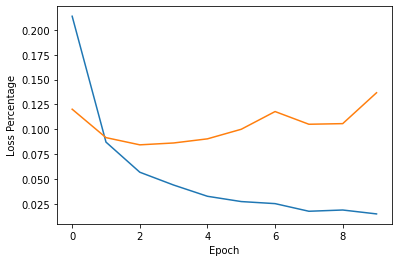

In [32]:
plt.plot(ann_train.history['loss'], label='train_loss')
plt.plot(ann_train.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Percentage')
plt.show()

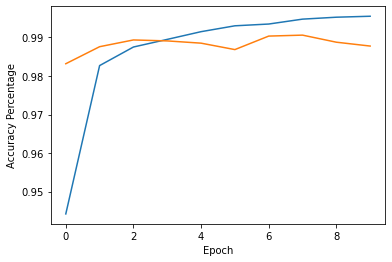

In [33]:
plt.plot(cnn_train.history['accuracy'], label='train_accuracy')
plt.plot(cnn_train.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Percentage')
plt.show()

313/313 [==============================] - 1s 2ms/step


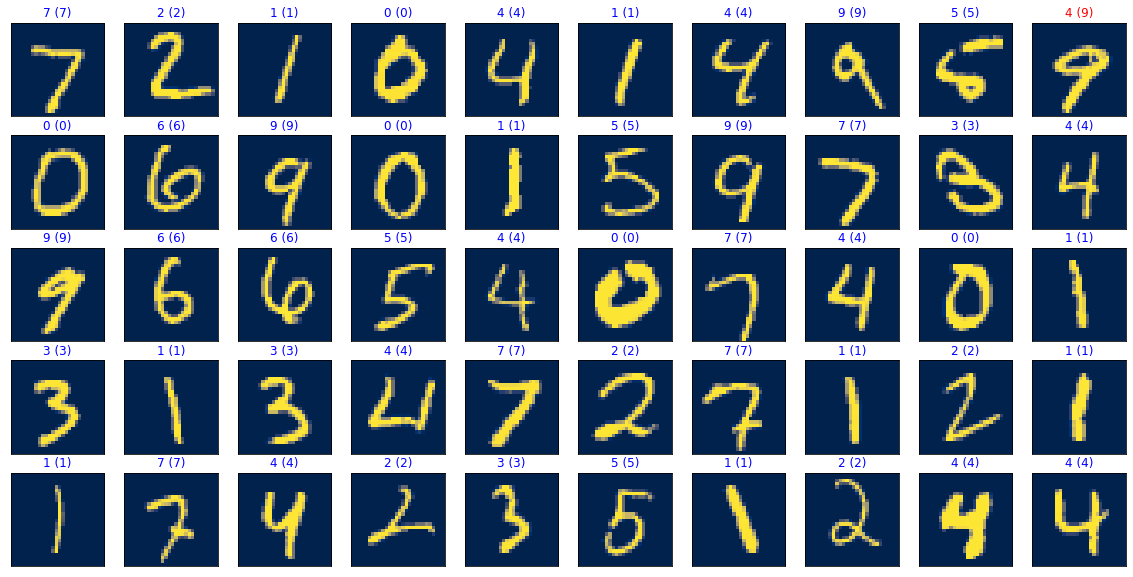

In [34]:
img_visual(ann_model, xtest, y_test)

## K-Nearest Neighbour Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
x_train = xtrain.reshape(60000, 784)
x_test = xtest.reshape(10000, 784)

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data = scaler.fit_transform(mnist['data'])

# Split the dataset into training and test sets
xtrain_knn, xtest_knn, ytrain_knn, ytest_knn = train_test_split(scaled_data, mnist['target'], test_size=0.3)


In [37]:
type(xtrain_knn), type(xtest_knn), type(ytrain_knn), type(ytest_knn)

(numpy.ndarray,
 numpy.ndarray,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [38]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(xtrain_knn, ytrain_knn)

KNeighborsClassifier(n_neighbors=1)

In [39]:
knn_pred = knn_model.predict(xtest_knn)

In [40]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [41]:
pd.crosstab(ytest_knn, knn_pred)

col_0,0,1,2,3,4,5,6,7,8,9
class,,,,,,,,,,
0,2128,2,4,4,0,8,20,1,1,1
1,1,2377,9,2,4,2,4,7,0,1
2,12,12,1910,30,4,3,16,26,12,8
3,1,3,28,2039,3,43,3,24,22,17
4,0,18,11,0,1841,6,6,12,7,68
5,8,1,3,55,5,1735,35,4,29,23
6,32,4,9,4,6,13,2047,0,3,0
7,2,19,12,3,16,0,0,1993,2,56
8,15,19,11,37,13,51,15,9,1808,19


In [42]:
print(classification_report(ytest_knn, knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2169
           1       0.97      0.99      0.98      2407
           2       0.95      0.94      0.95      2033
           3       0.93      0.93      0.93      2183
           4       0.95      0.93      0.94      1969
           5       0.93      0.91      0.92      1898
           6       0.95      0.97      0.96      2118
           7       0.93      0.95      0.94      2103
           8       0.96      0.91      0.93      1997
           9       0.91      0.93      0.92      2123

    accuracy                           0.95     21000
   macro avg       0.94      0.94      0.94     21000
weighted avg       0.95      0.95      0.94     21000



## Support Vector Machine model

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
svc_model = SVC(verbose=2)
svc_model.fit(xtrain_knn, ytrain_knn)

[LibSVM]

SVC(verbose=2)

In [45]:
svc_pred = svc_model.predict(xtest_knn)

In [46]:
pd.crosstab(ytest_knn, svc_pred)

col_0,0,1,2,3,4,5,6,7,8,9
class,,,,,,,,,,
0,2128,1,4,4,1,5,14,6,6,0
1,0,2367,12,11,1,0,2,8,5,1
2,6,3,1969,11,6,0,6,19,10,3
3,1,5,24,2064,3,24,1,34,21,6
4,2,7,20,0,1888,3,8,7,3,31
5,5,3,6,20,5,1798,27,19,11,4
6,9,1,6,1,6,13,2053,19,10,0
7,3,10,11,1,14,0,0,2034,3,27
8,4,15,12,12,4,19,10,17,1895,9


In [47]:
print(classification_report(ytest_knn, svc_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2169
           1       0.98      0.98      0.98      2407
           2       0.95      0.97      0.96      2033
           3       0.96      0.95      0.95      2183
           4       0.97      0.96      0.96      1969
           5       0.96      0.95      0.96      1898
           6       0.97      0.97      0.97      2118
           7       0.92      0.97      0.94      2103
           8       0.96      0.95      0.96      1997
           9       0.96      0.94      0.95      2123

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



## XGBoost Classifier

In [48]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(n_jobs=-1)


In [49]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
# Evaluate the model on the test set
xgb_pred = xgb_model.predict(x_test)

In [51]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.99      0.96      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.99      0.95      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.95      0.97      1028
           8       0.98      0.94      0.96       974
           9       0.98      0.94      0.96      1009

   micro avg       0.99      0.96      0.97     10000
   macro avg       0.99      0.96      0.97     10000
weighted avg       0.99      0.96      0.97     10000
 samples avg       0.96      0.96      0.96     10000



# Image Prediction

1/1 [==============================] - 0s 111ms/step


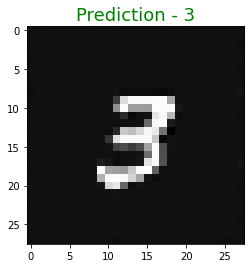

In [4]:
from keras import models
from keras.utils import load_img, img_to_array

hwd_prediction_model = models.load_model('handwrittendigits_cnn_model.h5')

def hwd_prediction(filename, model):
    imge = load_img(filename, color_mode="grayscale", target_size=(28, 28))
    image = img_to_array(imge)
    image1 = np.expand_dims(image, axis=0)

    # Make a prediction
    prediction = model.predict(image1)

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Display the image with its predicted label as title
    plt.title('Prediction - {}'.format(predicted_class), size=18, color='green')
    plt.imshow(image, cmap='gray')
    plt.show()

hwd_prediction(r"C:\Users\MUKESH L\Downloads\Handwritten-digits-from-the-MNIST-data-set-5-For-practical-machine-learning-tasks.png", hwd_prediction_model)


# Summary

* CNN/ANN are algorithms of deep learning techniques that has been successfully invoked for handling
   computer vision issues such as picture classification, object segmentation, and image analysis.
* They have been used to address the classification of minst dataset accurate detection and classification
   of handwritten digits.
* Apart from Deep learning algorithms, I've utilized SVM, KNN & XGBoosting from machine learning to do the image classification

# Insights from the models

The accuracies from the models are listed below :
1. cnn model - 99.67%
2. ann model - 99.36%
3. knn model - 94.00%
4. svm model - 96.00%
5. xgb model - 97.00%

# Conclusion

CNN/ANN are widely regarded as the most successful techniques for any prediction problem involving input image data. Various CNN/ANN methods with learning rate approach have been studied for the classification of images

# Challenges Faced

Hyper parameter tuning is not feasible due to time constraint which we tried both Grid & RandomizedCV

# Implementation with Flask deployment

  To identify the predictions using Flask with the help of web application 

In [ ]:
# Importing the libraries
import os
import uuid
import flask
import urllib
import pickle,sklearn
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from flask import Flask , render_template  , request , send_file
from tensorflow.keras.preprocessing.image import load_img , img_to_array

# Creating the App for Flask 
app = Flask(__name__)

# Fetching the Model using cnn model
BASE_DIR = os.path.dirname(os.path.abspath('handwrittendigits_cnn_model.h5'))
model = load_model(os.path.join(BASE_DIR ,'handwrittendigits_cnn_model.h5'))


ALLOWED_EXT = set(['jpg', 'JPG' , 'jpeg' , 'png' , 'jfif'])

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1] in ALLOWED_EXT

classes = [0,1,2,3,4,5,6,7,8,9]


def predict(filename , model):
    img = load_img(filename ,color_mode='grayscale', target_size = (28 , 28))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    
    # Image prediction
    result = model.predict(img)
    # Get the prediction
    predictions = np.argmax(result)
    
    return(result, predictions)

@app.route('/')
def home():
        return render_template("index.html")

@app.route('/predict' , methods = ['GET' , 'POST'])
def Handwrittendigits():
    error = ''
    target_img = os.path.join(os.getcwd() , 'static\\images')
    if request.method == 'POST':
        if(request.form):
            link = request.form.get('link')
            try :
                resource = urllib.request.urlopen(link)
                unique_filename = str(uuid.uuid4())
                filename = unique_filename+".jpg"
                img_path = os.path.join(target_img , filename)
                output = open(img_path , "wb")
                output.write(resource.read())
                output.close()
                img = filename
                result, predictions = predict(img_path , model)

                class_result , prob_result = predict(img_path , model)

                predictions = {
                      "class1":class_result[0]                    
                }

            except Exception as e : 
                print(str(e))
                error = 'This image from this site is not accesible or inappropriate input'

            if(len(error) == 0):
                return  render_template('body.html' , img  = img , predictions = predictions)
            else:
                return render_template('index.html' ,predictions=predictions, error = error) 


            
        elif (request.files):
            file = request.files['file']
            if file and allowed_file(file.filename):
                file.save(os.path.join(target_img , file.filename))
                img_path = os.path.join(target_img , file.filename)
                img = file.filename
                result, predicted_class = predict(img_path , model)
                print(predicted_class)

                class_result , prob_result = predict(img_path , model)

                predictions = {
                      "class1":class_result[0]
                }

            else:
                error = "Please upload images of jpg , jpeg and png extension only"

            if(len(error) == 0):
                return  render_template('body.html' , img  = img , predictions = predictions)
           

            
            else:
                return render_template('index.html' ,predictions=predictions, error = error)

    else:
        return render_template('index.html')

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Sep/2023 14:20:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2023 14:20:38] "GET /static/css/normalize.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Sep/2023 14:20:38] "GET /static/css/grid.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Sep/2023 14:20:38] "GET /static/css/style.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Sep/2023 14:20:38] "GET /static/css/front.jpg HTTP/1.1" 404 -


1/1 [==============================] - 0s 70ms/step
3
1/1 [==============================] - 0s 20ms/step


127.0.0.1 - - [20/Sep/2023 14:20:44] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [20/Sep/2023 14:20:44] "GET /static/css/grid.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Sep/2023 14:20:44] "GET /static/css/normalize.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Sep/2023 14:20:44] "GET /static/css/styleSucc.css HTTP/1.1" 404 -
